In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dat_hea_reader import *
from eeg_avg import *
import scipy.signal as sig

Leemos los datos

In [9]:
path_realizacion = r'datos_ejemplo_señales\N1_evoked_raw_100_F1_R1'
fs, trials, comments = read_trials(path_realizacion)

Promediamos

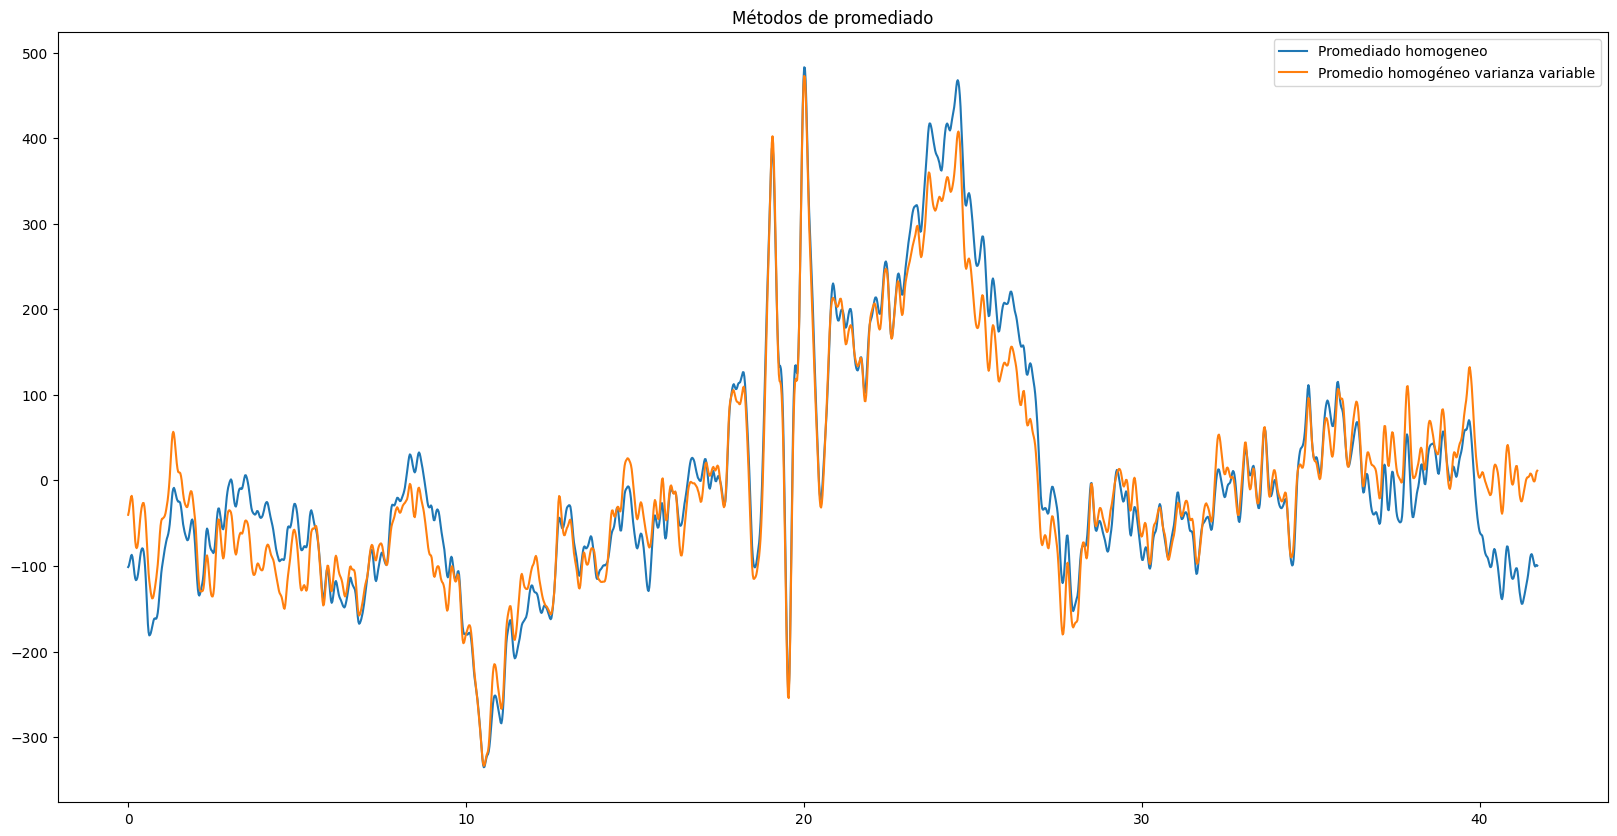

In [11]:
tr_len = comments['Trial Length (samples)']
t = np.linspace(0, tr_len/fs, tr_len)*1000 # convert to ms
trials_mean = average_EEG(trials, mode='homogenous') 
trials_amp = average_EEG(trials, mode='amp')
trials_var = average_EEG(trials, mode='var')
trials_both = average_EEG(trials, mode='both')

plt.figure(figsize = (20,10))
plt.plot(t, trials_mean, label='Promediado homogeneo')
#plt.plot(t, trials_amp, label='Promedio inhomogéneo amplitud variable')
plt.plot(t, trials_var, label='Promedio homogéneo varianza variable')
#plt.plot(t, trials_both, label='Promedio inhomogéneo todo variable')
plt.title('Métodos de promediado')
plt.legend()
plt.show()

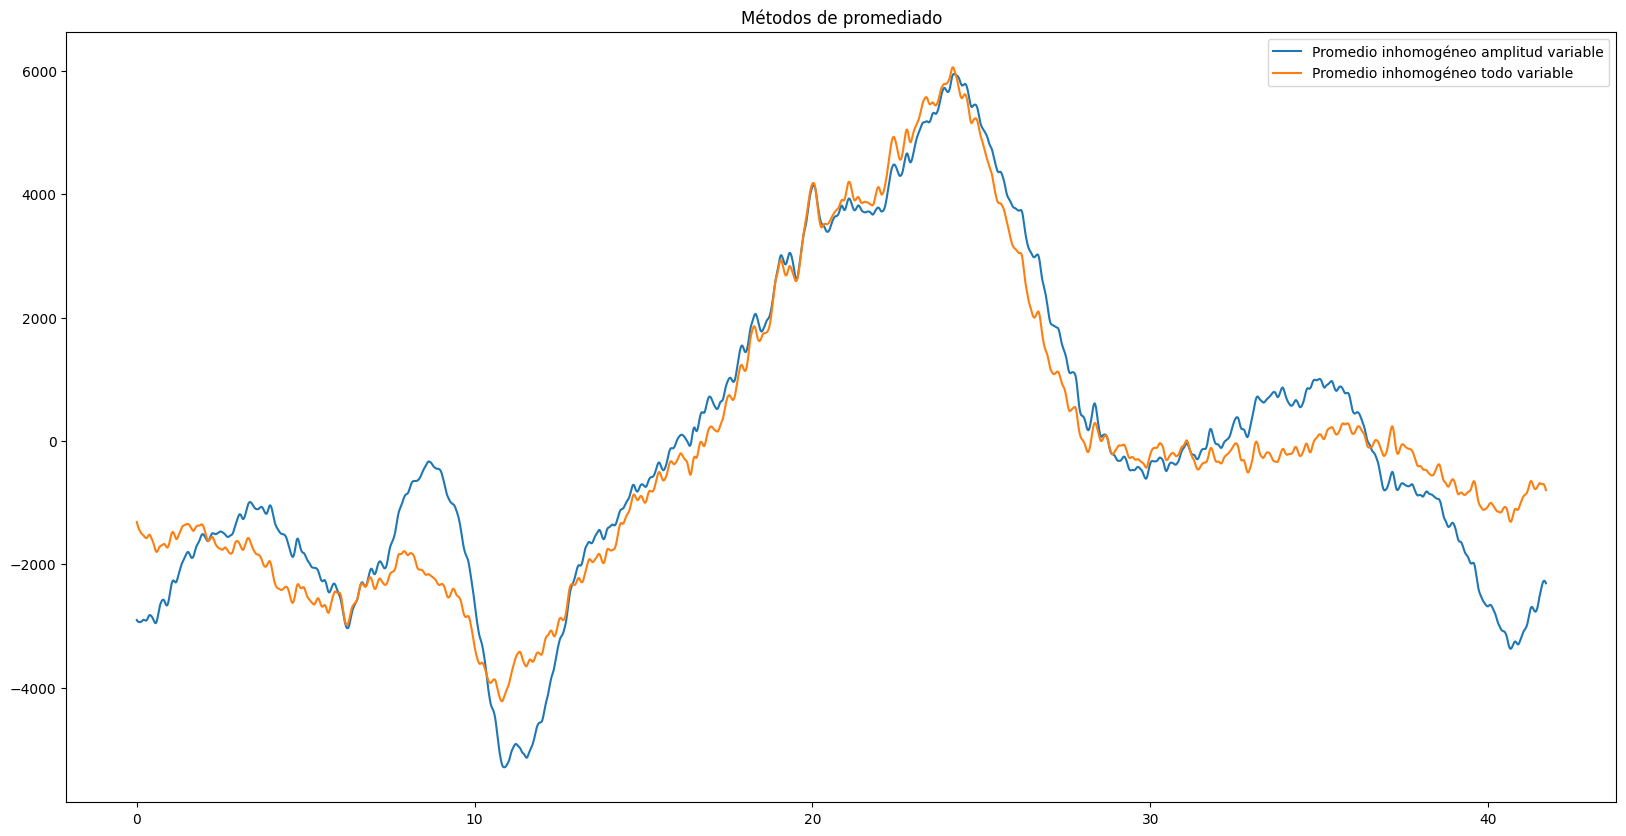

In [12]:
plt.figure(figsize = (20,10))
plt.plot(t, trials_amp, label='Promedio inhomogéneo amplitud variable')
plt.plot(t, trials_both, label='Promedio inhomogéneo todo variable')
plt.title('Métodos de promediado')
plt.legend()
plt.show()

Guardamos los promedios en un archivo .csv

In [13]:
df = pd.DataFrame({'t':t, 'mean':trials_mean, 'amp':trials_amp, 'var':trials_var, 'both':trials_both})
df.to_csv("N1_evoked_raw_100_F1_R1.csv")
df.head(10)

,t,mean,amp,var,both
0,0.000000,-101.261802,-2900.312465,-40.208983,-1311.406675
1,0.020844,-99.788946,-2919.894712,-36.562378,-1358.329163
2,0.041687,-96.153937,-2928.911904,-30.381518,-1395.587366
3,0.062531,-92.406991,-2932.443821,-24.711762,-1425.632074
4,0.083375,-88.571674,-2933.256406,-19.669745,-1448.610593
5,0.104219,-86.986881,-2935.144349,-18.038982,-1471.401168
6,0.125062,-89.160816,-2930.994629,-22.010597,-1489.042854
7,0.145906,-94.563253,-2920.575800,-31.353909,-1500.805840
8,0.166750,-102.163190,-2910.277470,-44.797383,-1511.867102
9,0.187594,-109.433208,-2900.336669,-59.115685,-1523.076729


(array([2.57287123e+04, 4.94485878e+04, 4.35646746e+04, ...,
        1.49793164e-05, 2.26407949e-05, 1.36304610e-05]),
 array([0.0000000e+00, 2.3976024e+01, 4.7952048e+01, ..., 2.3952048e+04,
        2.3976024e+04, 2.4000000e+04]))

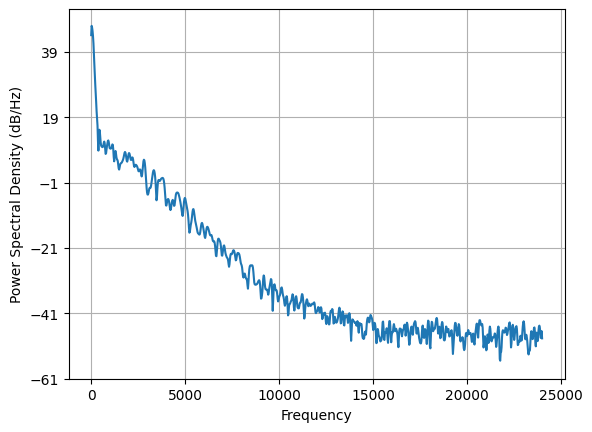

In [14]:
n = len(trials_both)
plt.psd(trials_both, NFFT=n//4, Fs=fs, window=np.bartlett(n//4), noverlap=0, pad_to=n)

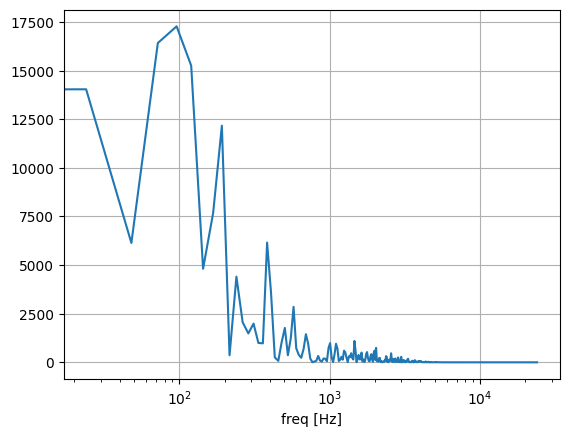

In [30]:
nperseg=nfft=n
freq, first_sig_psd = sig.welch(trials[0], nperseg=nperseg, nfft=nfft, window='hamming', noverlap=nperseg//2, fs=fs)
plt.semilogx(freq, first_sig_psd)
plt.xlabel('freq [Hz]')
plt.grid('on')

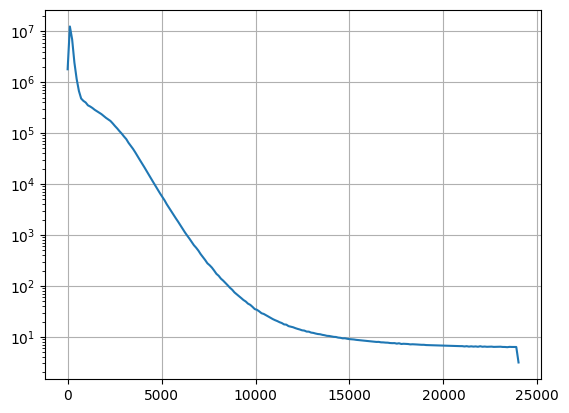

In [22]:
avg_psd = sum([sig.welch(trial, nperseg=nperseg, nfft=nfft, window='hamming', noverlap=nperseg//2, fs=fs)[1] 
               for trial in trials])
plt.semilogy(freq, avg_psd)
plt.grid('on')
